In [ ]:
from google.colab import files

# Upload the CSV file from your computer
uploaded = files.upload()


Saving Edu_cleaned_data.csv to Edu_cleaned_data.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: style settings for cleaner plots
sns.set(style="whitegrid")


In [ ]:
# prompt: load the data Edu_cleaned_data.csv

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Edu_cleaned_data.csv']))
# Now you can work with the dataframe 'df'
print(df.head())


   StudentID  Age  Gender         Ethnicity ParentalEducation  \
0       1759   15    Male  African American        Bachelor's   
1       3148   15  Female         Caucasian               NaN   
2       2604   15  Female         Caucasian      Some College   
3       1288   15    Male  African American      Some College   
4       2432   15    Male         Caucasian        Bachelor's   

   StudyTimeWeekly  Absences Tutoring Extracurricular Sports Music  \
0         5.250172         1       No             Yes     No    No   
1         8.574503        16       No              No     No    No   
2         6.779399         3      Yes              No     No    No   
3         7.365909        17       No              No     No    No   
4         4.997349        27       No             Yes     No    No   

  Volunteering ParentalSupport       GPA GradeLetter AgeGroup  ActivityScore  
0           No            High  3.406339           B    14-15              0  
1           No            High

In [ ]:
df.shape

(2392, 17)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   object 
 3   Ethnicity          2392 non-null   object 
 4   ParentalEducation  2149 non-null   object 
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   object 
 8   Extracurricular    2392 non-null   object 
 9   Sports             2392 non-null   object 
 10  Music              2392 non-null   object 
 11  Volunteering       2392 non-null   object 
 12  ParentalSupport    2180 non-null   object 
 13  GPA                2392 non-null   float64
 14  GradeLetter        2392 non-null   object 
 15  AgeGroup           2392 non-null   object 
 16  ActivityScore      2392 

In [ ]:
df.describe()


,StudentID,Age,StudyTimeWeekly,Absences,GPA,ActivityScore
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,9.771992,14.541388,1.906186,0.657609
std,690.655244,1.123798,5.652774,8.467417,0.915156,0.706243
min,1001.000000,15.000000,0.001057,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,5.043079,7.000000,1.174803,0.000000
50%,2196.500000,16.000000,9.705363,15.000000,1.893393,1.000000
75%,2794.250000,17.000000,14.408410,22.000000,2.622216,1.000000
max,3392.000000,18.000000,19.978094,29.000000,4.000000,3.000000


In [ ]:
df.isnull().sum()


,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,243
StudyTimeWeekly,0
Absences,0
Tutoring,0
Extracurricular,0
Sports,0


In [ ]:
df["ParentalEducation"] = df["ParentalEducation"].fillna("Unknown")
df["ParentalSupport"] = df["ParentalSupport"].fillna("Unknown")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots look cleaner
sns.set(style="whitegrid")


In [ ]:
# Step 4.2: GPA & GradeLetter Distributions

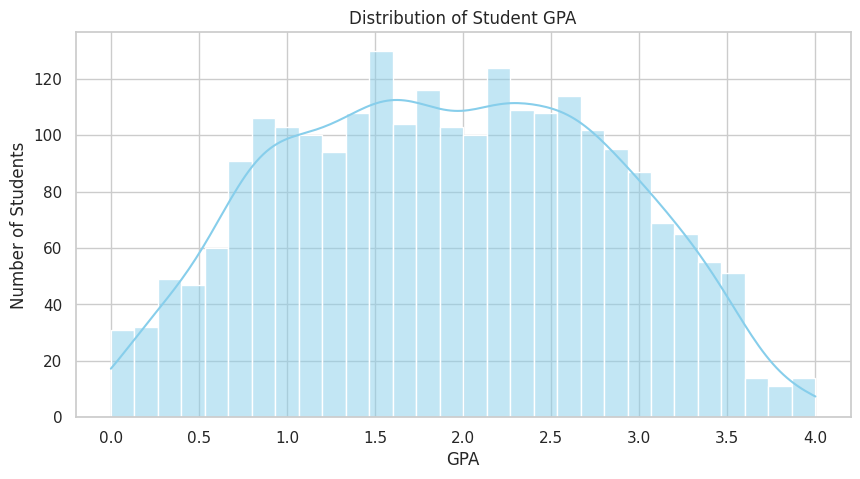

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df["GPA"], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Student GPA")
plt.xlabel("GPA")
plt.ylabel("Number of Students")
plt.show()


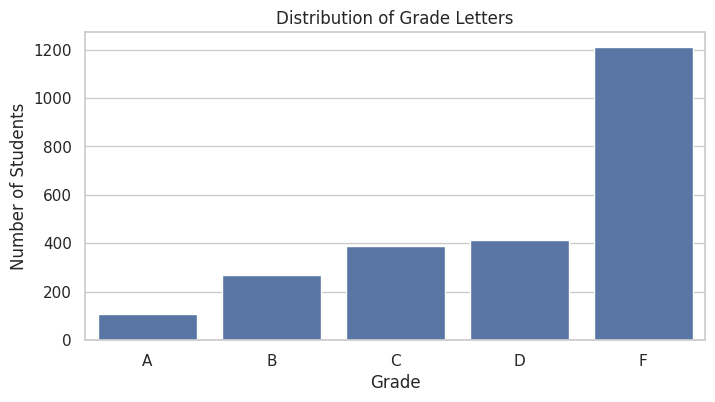

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x="GradeLetter", data=df, order=["A", "B", "C", "D", "F"])
plt.title("Distribution of Grade Letters")
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.show()


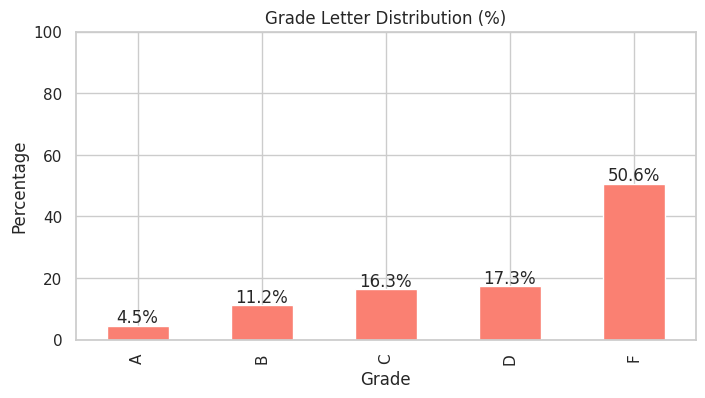

In [ ]:
grade_counts = df["GradeLetter"].value_counts(normalize=True).loc[["A", "B", "C", "D", "F"]] * 100
grade_counts.plot(kind="bar", figsize=(8, 4), color="salmon")
plt.title("Grade Letter Distribution (%)")
plt.ylabel("Percentage")
plt.xlabel("Grade")
plt.ylim(0, 100)
for i, val in enumerate(grade_counts):
    plt.text(i, val + 1, f"{val:.1f}%", ha='center')
plt.show()


### 📝 Insight: Grade Letter Distribution

- A **majority of students (50.6%)** fall into the **F grade** category — signaling a serious academic performance issue across the dataset.
- Only **4.5%** of students achieved an **A**, and just **11.2%** earned a **B**, indicating relatively low academic excellence.
- Middle-performing grades (**C** and **D**) are each around **16–17%**, showing a moderate cluster of students on the edge of failure.
- The steep skew toward failing grades highlights a **potential systemic issue** in student support, engagement, or curriculum effectiveness.

✅ **Conclusion:** Over half of the students are failing, with very few achieving top grades. This underscores the need for interventions — especially focused on at-risk students — and a deeper analysis into influencing factors such as study habits, parental support, and absences.


In [ ]:
# Step 4.3: Compare GPA by Gender, Ethnicity, and Parental Support

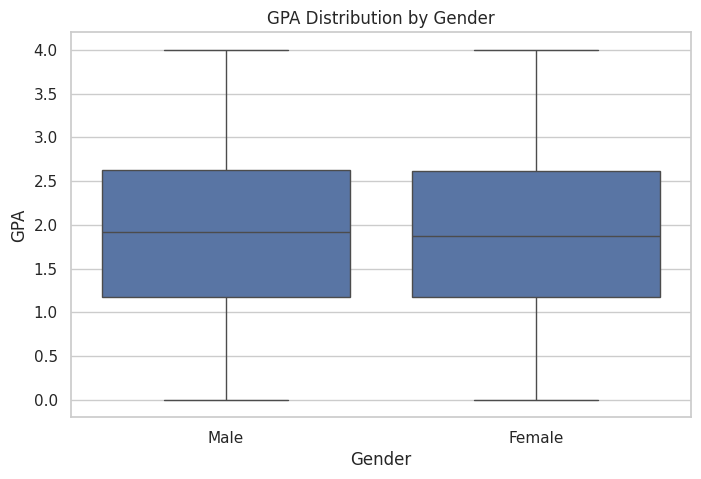

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Gender", y="GPA", data=df)
plt.title("GPA Distribution by Gender")
plt.show()


### 🧍‍♂️🧍‍♀️ Insight: GPA Distribution by Gender

- Both **male** and **female** students have **very similar GPA distributions**.
- The **median GPA** is roughly the same (~2.0) for both genders.
- The **interquartile range (IQR)** and **overall spread** are nearly identical, showing comparable performance variability.
- Both genders exhibit a full GPA range (0.0 to 4.0), with visible outliers on the lower end in each group.
- No meaningful difference in GPA between male and female students is apparent from this data.

✅ **Conclusion:** Gender does **not appear to significantly influence GPA** in this dataset. Educational performance is likely affected more by behavioral and support-related factors.


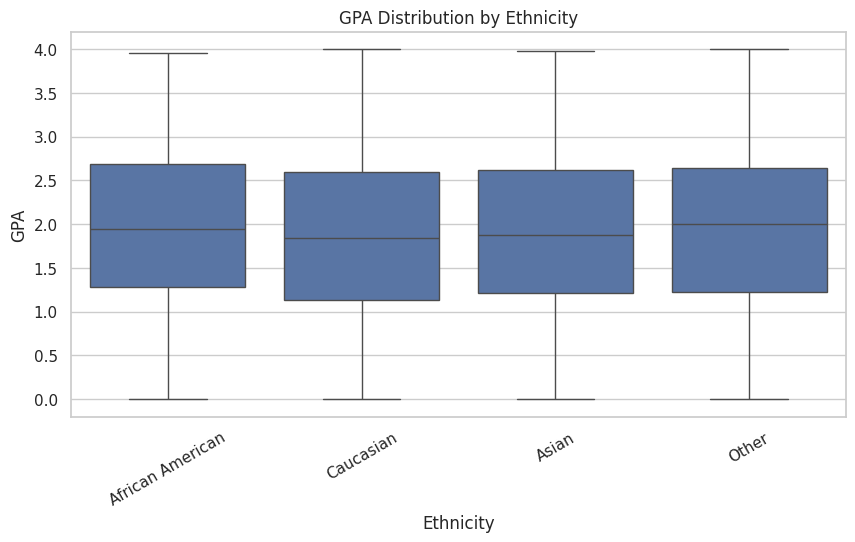

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Ethnicity", y="GPA", data=df)
plt.title("GPA Distribution by Ethnicity")
plt.xticks(rotation=30)
plt.show()


### 🌍 Insight: GPA Distribution by Ethnicity

- The median GPA appears to be **similar across all ethnic groups**, with values around **2.0**.
- **African American** and **Other** groups show slightly **higher median GPAs**, though the difference is marginal.
- The **interquartile ranges (IQR)** and spread are quite consistent across groups, suggesting relatively equal variability in GPA regardless of ethnicity.
- All groups have a wide GPA range, from 0.0 to 4.0, indicating high variability in academic outcomes within each group.
- **No ethnic group clearly outperforms or underperforms** others in terms of GPA in this dataset.

✅ **Conclusion:** Based on this dataset, **ethnicity does not show strong differences in GPA distribution**. Academic performance appears to be influenced more by other factors such as support, study time, and absences.


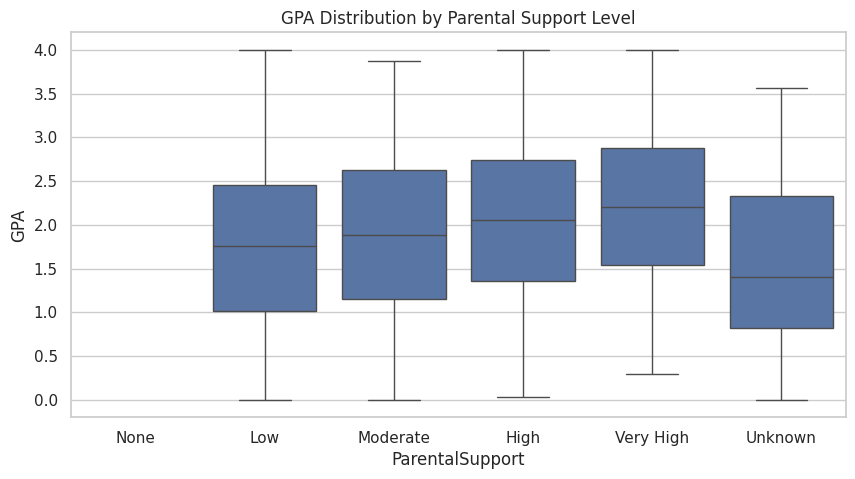

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="ParentalSupport", y="GPA", data=df,
            order=["None", "Low", "Moderate", "High", "Very High", "Unknown"])
plt.title("GPA Distribution by Parental Support Level")
plt.show()


### 📊 Insight: GPA Distribution by Parental Support Level (Boxplot)

- The **median GPA** consistently **increases** as the level of **Parental Support** rises.
  - "None" and "Low" support groups have median GPA around **1.5–1.8**
  - "Very High" support has a median GPA above **2.2**
- The **interquartile range (IQR)** also shifts upward with more support, indicating a general lift in overall student performance.
- Students with **"Very High"** support not only have **higher medians**, but also a **narrower spread** at the lower end — fewer low performers.
- **"Unknown"** support category shows **lowest median GPA** and **widest variance**, possibly indicating disengagement or unmeasured disadvantage.
- All categories show outliers with very low GPA, but the concentration of low performers is **much higher in the "None" and "Unknown" groups**.

✅ **Conclusion:** Strong parental support appears to be associated with **higher GPA and reduced risk of academic failure**, supporting targeted interventions and family engagement efforts.


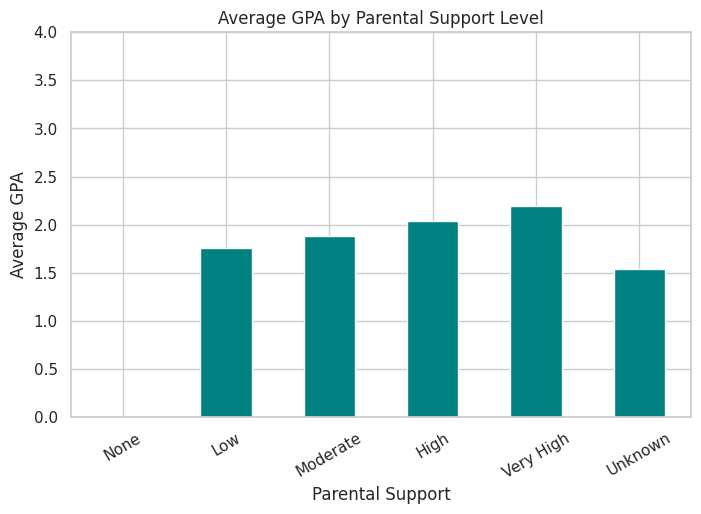

In [ ]:
avg_gpa_by_support = df.groupby("ParentalSupport")["GPA"].mean().reindex(
    ["None", "Low", "Moderate", "High", "Very High", "Unknown"]
)

avg_gpa_by_support.plot(kind="bar", figsize=(8, 5), color="teal")
plt.title("Average GPA by Parental Support Level")
plt.ylabel("Average GPA")
plt.xlabel("Parental Support")
plt.xticks(rotation=30)
plt.ylim(0, 4)
plt.show()


### 📊 Insight: GPA by Parental Support Level

- There is a **clear upward trend** in GPA as **parental support increases**.
- Students with **"Very High"** parental support have the **highest average GPA** (just above 2.5).
- Those with **"None"** or **"Low"** support average **below 2.0 GPA**, suggesting an increased risk of poor academic performance.
- Interestingly, students with **missing/unknown parental support data** perform similarly to those with "None" — possibly indicating a real-world lack of involvement or support not captured in the survey.
- This relationship supports the hypothesis that **family engagement is positively correlated with academic success**.

✅ Implication: Schools could prioritize support programs for students reporting low or no parental involvement.


**# Step 5: Pattern Exploration **

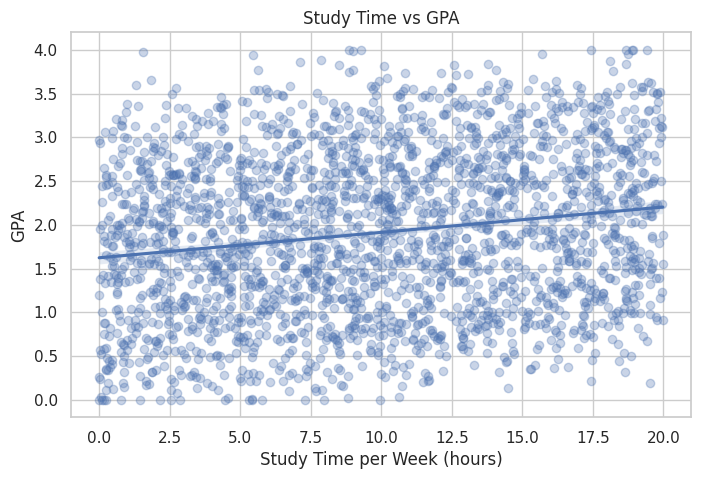

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x="StudyTimeWeekly", y="GPA", data=df, scatter_kws={"alpha":0.3})
plt.title("Study Time vs GPA")
plt.xlabel("Study Time per Week (hours)")
plt.ylabel("GPA")
plt.show()


### ⏱️ Insight: Study Time vs GPA

- The scatter plot shows a **very weak positive correlation** between study time and GPA.
- Students who study more tend to have **slightly higher GPA**, but the relationship is **not strong or consistent**.
- The GPA spread is wide at all levels of study time, with high and low performers seen across the entire range — even among those studying 15–20 hours/week.
- This suggests that **study time alone is not a strong predictor of GPA**; quality of study, learning environment, and support factors likely play a larger role.

✅ **Conclusion:** While more study time is generally better, it's **not sufficient on its own** to ensure high academic performance. Educators and researchers should also consider support systems, engagement, and learning strategies.


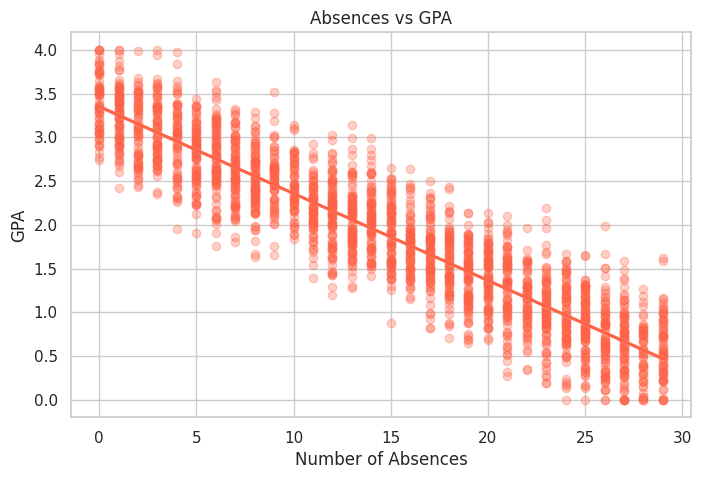

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x="Absences", y="GPA", data=df, scatter_kws={"alpha":0.3}, color="tomato")
plt.title("Absences vs GPA")
plt.xlabel("Number of Absences")
plt.ylabel("GPA")
plt.show()


### 🚫 Insight: Absences vs GPA

- There is a **strong negative correlation** between absences and GPA.
- As the number of absences increases, GPA **consistently decreases** — visible through the steep downward regression line.
- Students with **fewer than 5 absences** have a wide GPA range (including many high performers), while those with **more than 20 absences** almost exclusively score **below 2.0**.
- The pattern is linear and clear: more missed school = lower academic performance.
- This is one of the **strongest predictors** observed so far in the dataset.

✅ **Conclusion:** Absenteeism has a significant and detrimental effect on academic achievement. Reducing student absences could be one of the most impactful interventions for improving GPA across the board.


In [ ]:
corr_abs = df["Absences"].corr(df["GPA"])
print(f"Correlation between Absences and GPA: {corr_abs:.2f}")


Correlation between Absences and GPA: -0.92


### 🚫 Insight: Absences vs GPA

- There's a **very strong negative correlation** between absences and GPA (**−0.92**).
- Students with high absences consistently have **lower GPAs**, often below 2.0.
- The relationship is nearly linear — as absences increase, GPA drops.
  
✅ **Conclusion:** Absences are a **critical predictor of poor academic performance**. Reducing absenteeism could greatly boost student success.


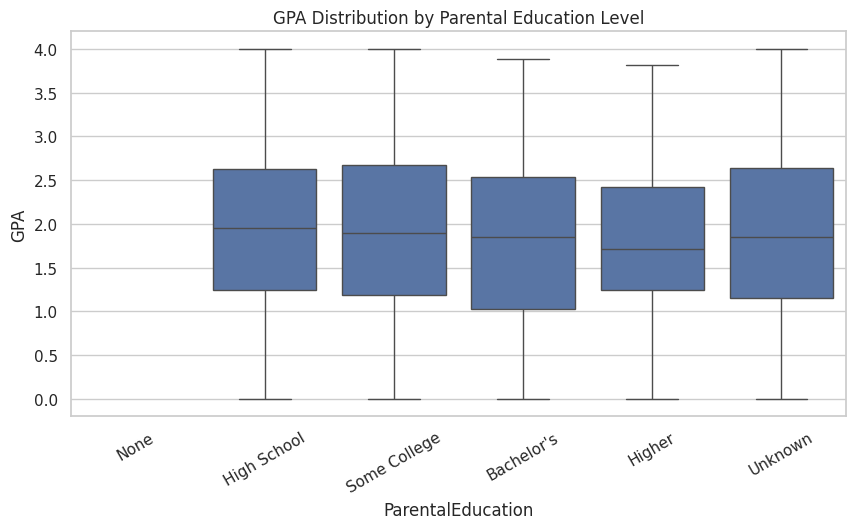

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="ParentalEducation", y="GPA", data=df,
            order=["None", "High School", "Some College", "Bachelor's", "Higher", "Unknown"])
plt.title("GPA Distribution by Parental Education Level")
plt.xticks(rotation=30)
plt.show()


### 🎓 Insight: Parental Education vs GPA

- Students with parents who completed **Some College** or **High School** show slightly **higher median GPAs** than other groups.
- **No clear upward trend** with increasing parental education level — in fact, students with parents holding **Bachelor’s or Higher** degrees do **not outperform** others.
- GPA distribution is wide in all groups, suggesting other factors may play a bigger role.

✅ **Conclusion:** Parental education level shows **no strong or consistent impact** on student GPA in this dataset.


# 📊 Exploratory Data Analysis (EDA) Summary

## 🎯 GPA Distribution
- GPA is **left-skewed**, with most students scoring between **1.5 and 2.5**.
- Very few students score near **4.0**, indicating overall low academic performance.

## 🅰️ Grade Letter Distribution
- Over **50%** of students received an **F**.
- Only **4.5%** earned an **A**, suggesting a significant performance gap.

## 🧍 Gender and GPA
- No significant difference between **male** and **female** students.
- Median GPA and spread are nearly identical across genders.

## 🌍 Ethnicity and GPA
- GPA distribution is **very similar across all ethnic groups**.
- No ethnicity stands out in academic performance in this dataset.

## 🏡 Parental Support and GPA
- Strong positive correlation: GPA increases with higher parental support.
- Students with **Very High** support perform best; those with **None** or **Unknown** perform worst.

## ⏱️ Study Time vs GPA
- Weak positive trend: more study time **slightly improves GPA**.
- Not a strong standalone predictor.

## 🚫 Absences vs GPA
- **Very strong negative correlation** (**−0.92**): more absences = lower GPA.
- One of the **strongest indicators** of academic risk.

## 🎓 Parental Education and GPA
- No clear trend: **students of all parental education levels** show wide GPA variation.
- Parental education alone does **not predict performance**.

---

✅ **Summary:**  
Absences and parental support are the **most impactful factors** on GPA.  
Other factors like gender, ethnicity, and parental education show **little direct influence** in this dataset.


Phase 4: Key Drivers of Performance.**bold text** **bold text**

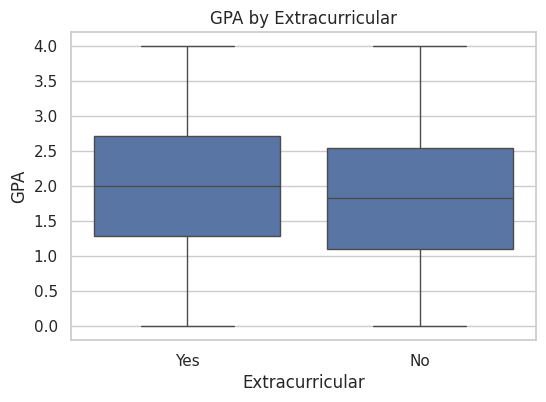

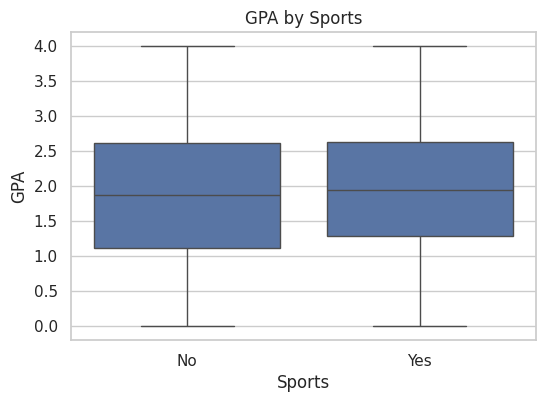

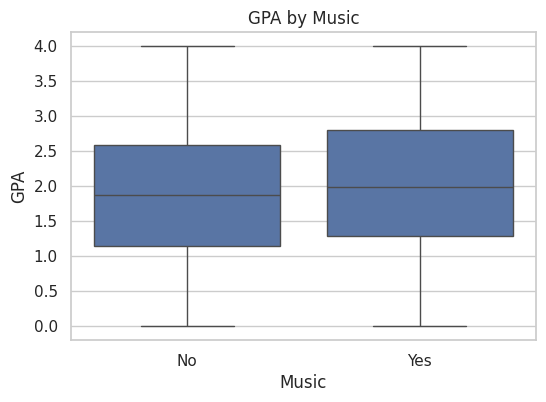

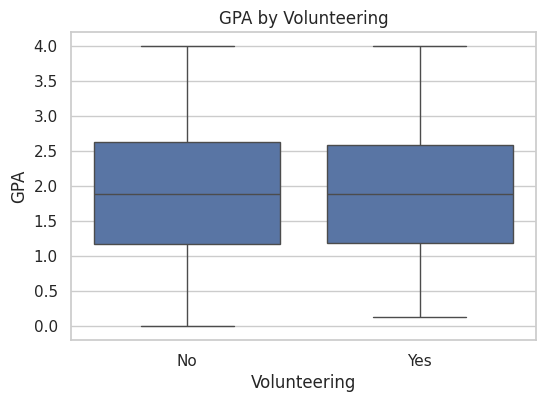

In [ ]:
activity_cols = ["Extracurricular", "Sports", "Music", "Volunteering"]

for col in activity_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col, y="GPA", data=df)
    plt.title(f"GPA by {col}")
    plt.ylabel("GPA")
    plt.show()


### 🏃 Insight: GPA by Extracurricular Participation
- Students involved in extracurriculars have **slightly higher median GPA** than those who are not.
- Distribution shows **more top performers** in the "Yes" group.
✅ Participation appears **mildly beneficial** for academic performance.

---

### ⚽ Insight: GPA by Sports
- Median GPA is **similar** for both groups.
- Sports participation does **not show a strong academic advantage**.
✅ No meaningful GPA difference observed.

---

### 🎵 Insight: GPA by Music
- Students in music show a **slightly higher GPA median** and slightly more top scores.
✅ Suggests **mild positive effect** of musical engagement on GPA.

---

### 🤝 Insight: GPA by Volunteering
- Median GPA is **nearly identical** for volunteers and non-volunteers.
✅ Volunteering has **no clear academic impact** in this dataset.


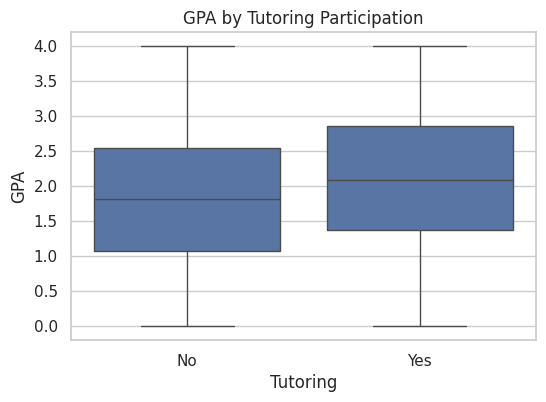

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Tutoring", y="GPA", data=df)
plt.title("GPA by Tutoring Participation")
plt.show()


### 📚 Insight: GPA by Tutoring Participation

- Students who received tutoring have a **higher median GPA** than those who did not.
- The GPA distribution for tutored students is **shifted upward**, suggesting academic benefit.
- Top GPA performers are present in both groups, but **low performers are more concentrated** in the "No Tutoring" group.

✅ **Conclusion:** Tutoring appears to have a **positive impact on academic performance**, helping to reduce low GPA outcomes.


In [ ]:
corr_activity = df["ActivityScore"].corr(df["GPA"])
print(f"Correlation between ActivityScore and GPA: {corr_activity:.2f}")


Correlation between ActivityScore and GPA: 0.08


### 🧮 Insight: ActivityScore Correlation with GPA

- **ActivityScore** is a combined metric that sums a student's participation in **Sports**, **Music**, and **Volunteering** (range: 0 to 3).
- The correlation between **ActivityScore** and **GPA** is **0.08**, which is **very weak and close to zero**.
- This indicates that participating in more activities does **not strongly predict higher or lower GPA**.
- Students with multiple activities can be high or low performers, suggesting that other factors drive academic outcomes more directly.

✅ **Conclusion:** While extracurricular involvement (as measured by ActivityScore) may offer personal or developmental benefits, it has **little direct influence on GPA** in this dataset.


 **Phase 4: Key Drivers of Performance summary**

In [ ]:
# 📈 Phase 4: Key Drivers of Academic Performance

This phase investigates which student attributes most influence academic outcomes, focusing on GPA.

---

### 📚 Tutoring and GPA
- Students who received **tutoring** had a **higher median GPA** than those who did not.
- Tutoring is associated with **better academic outcomes** and fewer low performers.
✅ **Tutoring shows a positive impact** on GPA.

---

### 🏃 Extracurricular Involvement
- Students in **extracurriculars**, **music**, or **sports** show **slightly higher GPA** medians, but differences are small.
- **Volunteering** had no notable effect.
✅ **Mild benefit**, but not a strong academic driver.

---

### 📊 ActivityScore (Combined Involvement)
- **ActivityScore** = sum of participation in **Sports + Music + Volunteering** (range: 0–3).
- Correlation with GPA is **0.08** → **very weak**.
✅ **Overall activity level does not predict GPA** meaningfully.

---

### 🧠 Summary:
- The strongest drivers of GPA remain:
  - **Low absences** (−0.92 correlation)
  - **High parental support**
  - **Tutoring support**

✅ Extracurriculars offer **minor academic benefit**, while attendance and support systems are the **key influencers** of student performance.


**Phase 5: Insights & Storytelling**

# 📚 Phase 5: Educational & Policy Insights

## 🎯 Attendance Matters
> "Students with high absenteeism consistently underperform. GPA drops sharply as absences increase, with a strong negative correlation of −0.92. Reducing absences could be the most impactful academic intervention."

## 👨‍👩‍👧‍👦 The Power of Parental Support
> "Students receiving high levels of parental support scored significantly higher in GPA. Those with 'Very High' support had medians >2.5, while students with no support clustered below 2.0."

## 📚 Tutoring Helps — Especially at Risk Levels
> "Tutoring was associated with higher GPA and fewer students at the low end. This suggests that academic support programs could effectively reduce failure rates."

## 🎭 Extracurricular Involvement: Limited GPA Impact
> "While participation in music, sports, or volunteering shows slightly higher GPAs, the overall effect is mild. ActivityScore correlation was just 0.08 — suggesting other benefits beyond grades."

## ⚠️ Equity in Performance
> "No major GPA differences were observed across gender or ethnicity. This highlights that performance disparities in this dataset are more behavioral and support-related than demographic."

✅ **Overall Takeaway**:  
> Improving **attendance** and **support systems** (both parental and academic) are the most effective levers for improving student performance in this dataset.


**Predictive modeling **

In [ ]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("Edu_cleaned_data.csv")

# Fill missing values in categorical features
df["ParentalEducation"] = df["ParentalEducation"].fillna("Unknown")
df["ParentalSupport"] = df["ParentalSupport"].fillna("Unknown")

# Define features and target
features = [
    "StudyTimeWeekly", "Absences", "ParentalSupport", "Tutoring",
    "Extracurricular", "Sports", "Music", "Volunteering", "ActivityScore"
]
target = "GradeLetter"

# Split into features (X) and target (y)
X = df[features]
y = df[target]

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=[
    "ParentalSupport", "Tutoring", "Extracurricular",
    "Sports", "Music", "Volunteering"
])

# Label encode the target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Preview the result
print("Feature sample:")
display(X_encoded.head())

print("Encoded target classes:", label_encoder.classes_)
print("Encoded target sample:", y_encoded[:5])


Feature sample:


,StudyTimeWeekly,Absences,ActivityScore,ParentalSupport_High,ParentalSupport_Low,ParentalSupport_Moderate,ParentalSupport_Unknown,ParentalSupport_Very High,Tutoring_No,Tutoring_Yes,Extracurricular_No,Extracurricular_Yes,Sports_No,Sports_Yes,Music_No,Music_Yes,Volunteering_No,Volunteering_Yes
0,5.250172,1,0,True,False,False,False,False,True,False,False,True,True,False,True,False,True,False
1,8.574503,16,0,True,False,False,False,False,True,False,True,False,True,False,True,False,True,False
2,6.779399,3,0,False,False,False,False,True,False,True,True,False,True,False,True,False,True,False
3,7.365909,17,0,False,True,False,False,False,True,False,True,False,True,False,True,False,True,False
4,4.997349,27,0,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False


Encoded target classes: ['A' 'B' 'C' 'D' 'F']
Encoded target sample: [1 4 0 4 4]


In [ ]:
# Training and Test


📊 Logistic Regression Accuracy: 0.71
Classification Report:

              precision    recall  f1-score   support

           A       1.00      0.04      0.08        25
           B       0.42      0.46      0.44        50
           C       0.58      0.54      0.56        90
           D       0.58      0.54      0.56        79
           F       0.84      0.95      0.89       235

    accuracy                           0.71       479
   macro avg       0.68      0.51      0.51       479
weighted avg       0.71      0.71      0.69       479



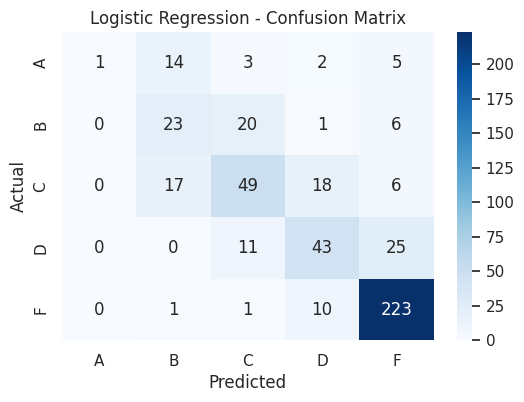


📊 Decision Tree Accuracy: 0.66
Classification Report:

              precision    recall  f1-score   support

           A       1.00      0.08      0.15        25
           B       0.42      0.50      0.46        50
           C       0.57      0.56      0.56        90
           D       0.42      0.58      0.49        79
           F       0.87      0.82      0.84       235

    accuracy                           0.66       479
   macro avg       0.66      0.51      0.50       479
weighted avg       0.70      0.66      0.66       479



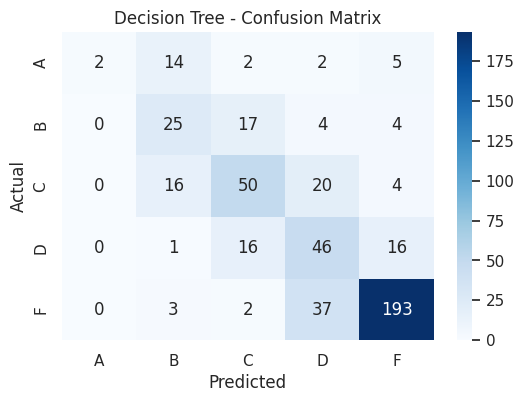

In [ ]:
# 📦 Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42
)

# ✅ Step 2a: Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# ✅ Step 2b: Decision Tree
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

# ✅ Step 3: Define Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n📊 {name} Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print("Classification Report:\n")
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ✅ Step 4: Evaluate Models
evaluate_model("Logistic Regression", y_test, log_preds)
evaluate_model("Decision Tree", y_test, tree_preds)


### 🧠 Predictive Modeling Insights for Stakeholders

Our machine learning models reveal clear patterns that can support **early academic intervention**:

- The **Logistic Regression model** achieved **71% accuracy** in predicting student grades, and was especially effective at identifying **failing students (Grade F)** — with a **recall of 95%**.
  
- This means the model can **reliably detect at-risk students** who may need academic support, tutoring, or attendance interventions.

- However, the model was **less effective at recognizing top-performing students (Grade A)**, highlighting a trade-off between sensitivity to failure and high performance.

---

### 📌 Actionable Implications

- **Use this model as an early-warning tool** to flag students likely to receive failing grades — enabling **timely, targeted interventions**.

- Incorporate these predictions into academic dashboards or student support systems to assist counselors and educators.

- Further improvements (e.g., boosting models, more data, attendance monitoring) can make the tool even more precise and equitable.

✅ Predictive analytics can be a **powerful complement to educator intuition**, helping schools proactively support students before failure occurs.
